# Analysing sound wave using fast Fourier transform

## Sound wave

A sound wave consists of compression and rarefaction of air molecules, which travels through space with sound speed $c_s$.
The figure below depicts the propagation of a _sinusoidal_ sound wave inside an infinitely long rectangular channel.
The figure shows the snapshots of the air molecules (represented by blue dots in the figure) at four different instantaneous time $t=0\,\text{s}$, $0.001\,\text{s}$, $0.002\,\text{s}$, and $0.003\,\text{s}$.
The regions of high density are called the compression regions (these look like fuzzy vertical blue bands in the figure) and the regions of low density are called the rarefaction regions.
In the figure, these bands of compression and rarefaction regions travel along the positive $x$-direction with speed equals to the sound speed $c_s$.
The wavelength of this sinusoidal sound wave is defined by the distance between two nearest compression bands, which is equal to $\lambda=2\,\text{m}$.
As we can see from the figure, after time $t=0.003\,\text{s}$, the bands will have travelled a distance of $1\,\text{m}$.
Therefore the speed of sound in this example is equal to:
\begin{equation}
c_s = \frac{1\,\text{m}}{0.003\,\text{s}} \simeq 333\,\text{ms}^{-1}.
\end{equation}
In general, the speed of sound depends on various factors such as ambient pressure and temperature.

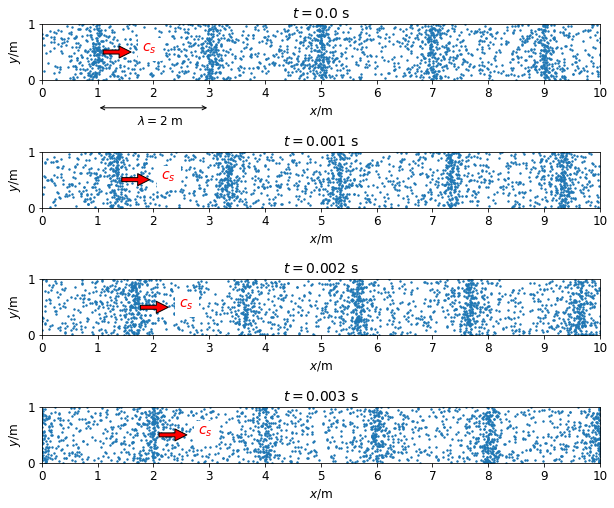

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Np = 6000 # number of particles
Lx, Ly = 10, 1
Dx = 0.25 # maximum displacement
lamb = 1.0 # wavelength
phi = 0.0 # phase difference

t = np.arange(0, 10, 0.001)

fig, ax = plt.subplots(4, figsize=(10,9))

for n in range(0, 4, 1):
    x = np.random.uniform(-Lx, 2*Lx, Np)
    y = np.random.uniform(0, Ly, Np)
    phi = np.pi/3*n
    x = x + Dx*np.sin(np.pi*x/lamb - phi)

    ax[n].set_title(f'$t = ${t[n]} s', fontsize=14)
    ax[n].set_xlabel('$x/$m', fontsize=12)
    ax[n].set_ylabel('$y/$m', fontsize=12)
    ax[n].set_xlim(0, Lx)
    ax[n].set_ylim(0, Ly)
    ax[n].set_aspect(1)
    ax[n].tick_params(axis='both', which='major', labelsize=12)
    ax[n].set_yticks(np.arange(0, 2, 1))
    ax[n].set_xticks(np.arange(0, 11, 1))
    ax[n].scatter(x, y, s=2)
    ax[n].annotate('', xy=(1.6+n/3,0.5), xytext=(1.1+n/3,0.5), arrowprops=dict(facecolor='red'))  
    ax[n].annotate('$c_s$', fontsize=14, backgroundcolor='white', c='red', xy=(1.8+n/3,0.5))  

ax[0].annotate('', c='black',
            xy=(1.0,-0.5),  # location of the arrow tip
            xytext=(3.0,-0.5),  # location of the text
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'),
            annotation_clip=False)

ax[0].annotate('$\lambda=2$ m', c='black', fontsize=12, xy=(1.7,-0.8), annotation_clip=False)

plt.show()

Now suppose that that we place a microphone at the end of the channel.
The compression and rarefaction of air will cause the diaphragm inside the microphone to vibrate.
This vibration is then converted into an electrical signal, which is shown in the figure below.
The horizontal axis in the figure represents the time $t$ (in units of seconds).
The vertical axis represents the voltage of the electrical signal produced by the microphone $V(t)$ (in some rescaled units, which we do not need to worry about).
As we can see in this example, the audio signal in the figure below has a sinusoidal form, which can be descibed by a trigonometric function:
\begin{equation}
V(t) = A\cos(\omega t + \phi),
\end{equation}
where $V(t)$ is the audio signal (in some rescaled units), $t$ is time (in seconds), $A$ is the amplitude, $\omega$ is the angular frequency, and $\phi$ is the phase difference.
The angular frequency $\omega$ is related to the frequency $f$ and period $T$ of the sound wave through this relation:
\begin{equation}
\omega = 2\pi f = \frac{2\pi}{T}. 
\end{equation}
From the plot below, we can measure the period to be $T=0.006\,\text{s}$, which translates to audio frequency of $f\simeq167\,\text{Hz}$.
Hz (prounounced as Hertz) is the SI unit of frequency, defined to be $\text{Hz}=\text{s}^{-1}$.

In the equation above, $V$, $A$, $\omega$, $\phi$, and $t$ are all real. 
However, sometimes it might be useful to write the audio signal in a complex form (as we shall see later in Fourier series) as follows:
\begin{equation}
V(t) = C e^{i\omega t} + C^{*} e^{-i\omega t} \text{, where $C=\frac{A}{2}e^{i\phi}$ is the complex amplitude (the rest of the variables are real).}
\end{equation}
The star $*$ above $C$ indicates complex conjugate operation.

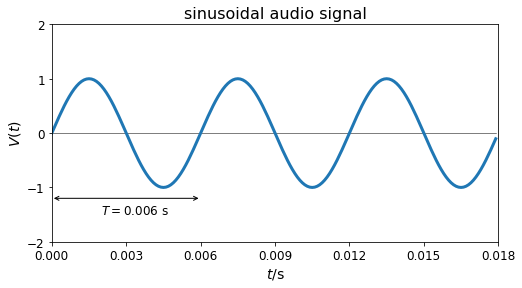

In [2]:
T = 0.006 # period
dt = 0.0001 # timestep
t = np.arange(0, 0.018, dt)
omega = np.pi*2/T
V = np.sin(omega*t)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('sinusoidal audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.018)
ax.set_ylim(-2, 2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-2, 2.1, 1))
ax.set_xticks(np.arange(0, 0.019, 0.003))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3)

ax.annotate('', c='black',
            xy=(0.0,-1.2),  # location of the arrow tip
            xytext=(0.006,-1.2),  # location of the text
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'),
            annotation_clip=False)

ax.annotate('$T = 0.006$ s', c='black', fontsize=12, xy=(0.002,-1.5), annotation_clip=False)

plt.show()

## Fourier series

In the plot above, the audio signal can be described by a single trigonometric function.
This is because we have assumed the sound wave to be sinusoidal.
However this is not true in general.
For example, the sound wave coming from a tuning fork is very close to a sinusoidal wave,
on the other hand, the sound wave from a saxophone is far from being sinusoidal.

Let us consider another audio signal from an unknown musical instrument, which is depicted in the figure below.
We can immediately tell that the signal is periodic with the same period $T=0.006\,\text{s}$ (or fundamental frequency $f\simeq167\,\text{Hz}$) as the one above.
However, the shape of the audio signal is much more complicated than a sinusoidal wave and cannot be simply described by a single trigonometric function.
Luckily, Fourier series allows us to decompose this periodic signal into a sum of trigonometric functions as follows:
\begin{equation}
V(t) = \sum_{n=-\infty}^{\infty} C_n e^{i\omega_n t} \text{, where }\omega_n=\frac{2\pi n}{T}.
\end{equation}
Each term in the Fourier series is a simple sinusoidal wave with angular frequency $\omega_n$ and
complex amplitude $C_n$'s.
The first non-constant term in the Fourier series corresponds to the _fundamental frequency_
$\omega_1 = \frac{2\pi}{T}$ shown by the first figure in the second row below.
The next term in the Fourier series has double the fundamental frequency $\omega_2=\frac{4\pi}{T}$ 
and is sometimes called the second harmonic, see the second figure in the second row below. 
The next next term has triple the fundamental frequency $\omega_3=\frac{6\pi}{T}$ and is sometimes called the third harmonic, see the third fi

To find the complex amplitudes $C_n$'s (or Fourier coefficients) we multiply the above equation by $e^{-i\omega_m t}$ and then integrate with respect to $t$ from $t=0$ to $t=T$.
\begin{equation}
\int_0^T V(t) e^{-i\omega_m t}\,dt = \sum_{n=-\infty}^{\infty} C_n \int_0^T e^{i(\omega_n - \omega_m) t}\,dt,
\end{equation}
where $m$ and $n$ are integers.
We note that the integral:
\begin{equation}
\int_0^T e^{i(\omega_n - \omega_m) t}\,dt = \int_0^T e^{i\frac{2\pi}{T}(n-m) t}\,dt =
\begin{cases}
T & \text{if } m = n \\
0 & \text{if } m \neq n
\end{cases}.
\end{equation}
More succintly, we can write,
\begin{equation}
\int_0^T e^{i(\omega_n - \omega_m) t}\,dt = T \delta_{mn},
\end{equation}
where the Kronecker delta $\delta_{mn}$ is defined to be equal to $1$ if $m=n$ and $0$ if $m\neq n$.
Therefore,
\begin{align}
\int_0^T V(t) e^{-i\omega_m t}\,dt &= \sum_{n=-\infty}^{\infty} C_n T \delta_{mn} = T C_m \\
\Rightarrow C_m &= \frac{1}{T} \int_0^T V(t) e^{-i\omega_m t}\,dt.
\end{align}

__Question 1.__
(a) Show that if $C_{-n}=C_n^*$ for all $n$, then $V(t)$ is real.
(b) Show that if $V(t)$ is real, then $C_{-n}=C_n^*$ for all $n$.

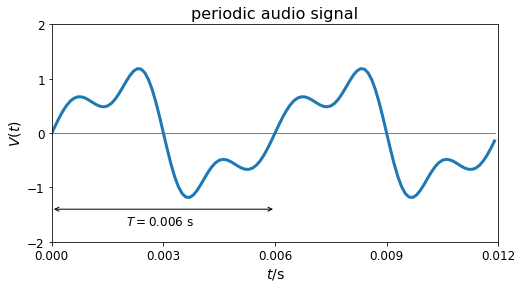

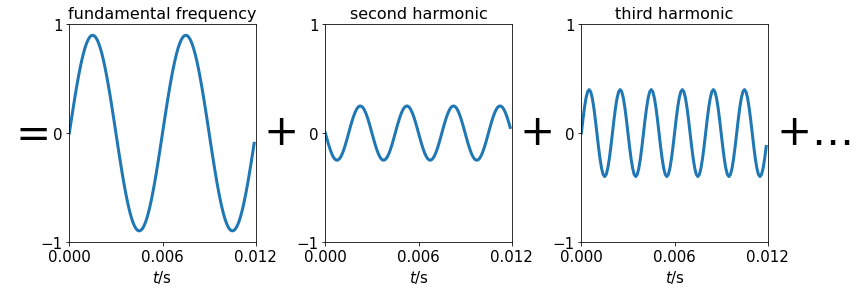

In [3]:
dt = 0.0001
T = 0.006
t = np.arange(0, 0.012, dt)
omega = np.pi*2/T
V = 0.9*np.sin(omega*t) - 0.25*np.sin(2*omega*t) + 0.4*np.sin(3*omega*t) - 0.05*np.sin(4*omega*t)
sin1 = 0.9*np.sin(omega*t)
sin2 = - 0.25*np.sin(2*omega*t)
sin3 = 0.4*np.sin(3*omega*t)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('periodic audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.012)
ax.set_ylim(-2, 2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-2, 2.1, 1))
ax.set_xticks(np.arange(0, 0.013, 0.003))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3)

ax.annotate('', c='black',
            xy=(0.0,-1.4),  # location of the arrow tip
            xytext=(0.006,-1.4),  # location of the text
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'),
            annotation_clip=False)

ax.annotate('$T = 0.006$ s', c='black', fontsize=12, xy=(0.002,-1.7), annotation_clip=False)

plt.show()

fig, ax = plt.subplots(1, 3, figsize=(13, 4))

for n in range(0, 3, 1):
    ax[n].set_xlabel('$t/$s', fontsize=15)
    ax[n].set_xlim(0, 0.012)
    ax[n].set_ylim(-1, 1)
    ax[n].set_aspect(0.007)
    ax[n].tick_params(axis='both', which='major', labelsize=15)
    ax[n].set_yticks(np.arange(-1, 1.1, 1))
    ax[n].set_xticks(np.arange(0, 0.013, 0.006))

ax[0].set_title('fundamental frequency', fontsize=16)
ax[0].plot(t, sin1, linewidth=3)
ax[0].annotate('$=$', c='black', fontsize=42, xy=(-0.004, -0.1), annotation_clip=False)
ax[0].annotate('$+$', c='black', fontsize=42, xy=(0.0125, -0.1), annotation_clip=False)
ax[1].set_title('second harmonic', fontsize=16)
ax[1].plot(t, sin2, linewidth=3)
ax[1].annotate('$+$', c='black', fontsize=42, xy=(0.0125, -0.1), annotation_clip=False)
ax[2].set_title('third harmonic', fontsize=16)
ax[2].plot(t, sin3, linewidth=3)
ax[2].annotate('$+\dots$', c='black', fontsize=42, xy=(0.0125, -0.1), annotation_clip=False)

plt.show()

## Fourier transform

In reality, the audio signal is not perfectly periodic since it might be contaminated by a background noise. 
Furthermore the oscillation of the sound wave itself decays gradually to zero, 
so a realistic representation of an audio signal recorded from a microphone might look something like the plot below.

To analyse this audio signal, we shall use Fourier transform, which is an extension of the Fourier series above by taking the limit $T\rightarrow\infty$ (loosely speaking, the function $V(t)$ is no longer periodic).
In this case the angular frequency of each Fourier component becomes continuous $\omega_n\rightarrow\omega\in\mathbb{R}$
and the summation over $n$ becomes an integral over $\omega$.
The Fourier transform of $V(t)$ is another function $\tilde{V}(\omega)$, which is a function of angular frequency $\omega$.
$V(t)$ and $\tilde{V}(\omega)$  are related through the following relations:
\begin{equation}
V(t) = \int_{-\infty}^\infty \tilde{V}(\omega) e^{i\omega t} d\omega \quad\text{and}\quad
\tilde{V}(\omega) = \frac{1}{2\pi}\int_{-\infty}^\infty V(t) e^{-i\omega t} dt,
\end{equation}
where $\omega\in\mathbb{R}$.
The above relations can be derived by taking the limit $T\rightarrow\infty$ in the definition of Fourier series and then relabelling $C_n \rightarrow \tilde{V}(\omega_n) \rightarrow \tilde{V}(\omega)$.

Now let us define the Dirac delta function $\delta(x - y)$ such that

The above relations work because of the following property:
\begin{equation}
\int e^{i (\alpha - \beta) t} \,dt = 2\pi \delta(\alpha - \beta),
\end{equation}
for all $\alpha,\beta,t\in\mathbb{R}$.

__Question 2.__
Show that if $V(t)$ is real then $\tilde{V}(-\omega)=\tilde{V}(\omega)^*$ for all $\omega\in\mathbb{R}$ and _vice versa_.

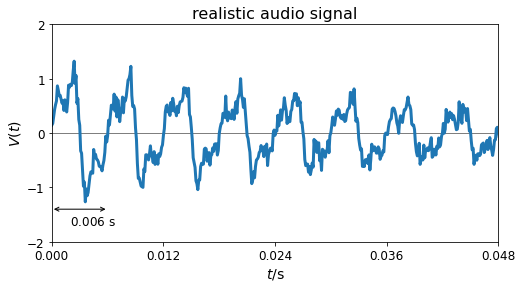

In [4]:
t = np.arange(0, 0.192, dt)
omega = np.pi*2/T
V = (0.9*np.sin(omega*t) - 0.25*np.sin(2*omega*t) + 0.4*np.sin(3*omega*t) - 0.05*np.sin(4*omega*t))*np.exp(-t/0.05) + 0.1*np.random.normal(0,1, np.shape(t))

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_title('realistic audio signal', fontsize=16)
ax.set_xlabel('$t/$s', fontsize=14)
ax.set_ylabel('$V(t)$', fontsize=14)
ax.set_xlim(0, 0.048)
ax.set_ylim(-2, 2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(np.arange(-2, 2.1, 1))
ax.set_xticks(np.arange(0, 0.049, 0.012))

ax.plot(t, t*0, c='black', linewidth=0.5)
ax.plot(t, V, linewidth=3)

ax.annotate('', c='black',
            xy=(0.0,-1.4),  # location of the arrow tip
            xytext=(0.006,-1.4),  # location of the text
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'),
            annotation_clip=False)

ax.annotate('$0.006$ s', c='black', fontsize=12, xy=(0.002,-1.7), annotation_clip=False)

plt.show()

## Energy spectrum

From electromagnetism, we learnt that the rate of power dissipation is given by:
\begin{equation}
P(t) = \frac{V(t)^2}{R},\quad\text{where $R$ is the electrical resistance.}
\end{equation}
The total energy dissipation is then given by the integral
\begin{equation}
E = \frac{1}{R}\int_{-\infty}^\infty V(t)^2\,dt
\end{equation}
Substituting the definition for Fourier transform to the above, we get:
\begin{align}
E &= \frac{1}{R} \int dt \int d\omega \int d\omega' \, \tilde{V}(\omega)\tilde{V}(\omega') e^{i (\omega + \omega') t} \\
&= \frac{2\pi}{R} \int d\omega \int d\omega' \, \tilde{V}(\omega)\tilde{V}(\omega') \delta(\omega + \omega') \\
&= \frac{2\pi}{R} \int d\omega \, \tilde{V}(\omega) \tilde{V}(-\omega) 
\end{align}
Since $V(t)$ is real, we have $\tilde{V}(-\omega)=\tilde{V}(\omega)^*$ from the previous exercise
and thus the total energy dissipation can be written as:
\begin{equation}
E = \frac{2\pi}{R} \int_{-\infty}^\infty d\omega \, |\tilde{V}(\omega)|^2 
\end{equation}
Now we can define the energy spectrum to be $\tilde{E}(\omega)=|\tilde{V}(\omega)|^2$.
Physically, Fourier transform allows us to decompose an electrical signal into an infinite sum of sinusoidal oscillations with different angular frequencies $\omega$'s.
The energy spectrum $\tilde{E}(\omega)$ gives the energy contribution from a single oscillation with particular angular frequency $\omega$.

__Question 3.__
Show that the energy spectrum is symmetric, _i.e._ $\tilde{E}(\omega)=\tilde{E}(-\omega)$. 

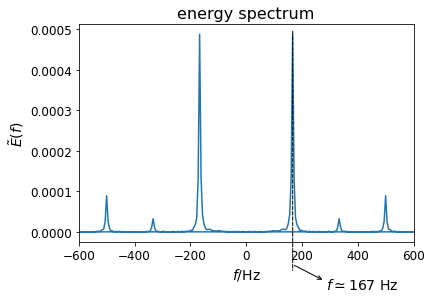

In [5]:
Nt = np.shape(V)[0]
f = 1/(Nt*dt)*np.concatenate((np.arange(0, Nt/2, 1), np.arange(-Nt/2, 0, 1)))

Vtilde = np.fft.fft(V)*dt # Fourier transform of V(t), Vtilde(omega)

fig, ax = plt.subplots(figsize=(6, 4))

ax.set_title('energy spectrum', fontsize=16)
ax.set_xlabel('$f/$Hz', fontsize=14)
ax.set_ylabel('$\\tilde{E}(f)$', fontsize=14)
ax.set_xlim(-600, 600)
#ax.set_ylim(0, 0.0005)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.set_yticks(np.arange(-2, 2.1, 1))
#ax.set_xticks(np.arange(0, 0.049, 0.012))

ax.plot(f, np.real(Vtilde*np.conjugate(Vtilde)))

ax.annotate('', c='black',
            xy=(167,-0.0001),  # location of the arrow tip
            xytext=(167,0.0005),  # location of the text
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='-', linestyle='--'),
            annotation_clip=False)

ax.annotate('', c='black',
            xy=(280,-0.00012),  # location of the arrow tip
            xytext=(167,-0.00008),  # location of the text
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='->'),
            annotation_clip=False)

ax.annotate('$f\simeq 167$ Hz', c='black', fontsize=14, xy=(285,-0.00014), annotation_clip=False)

plt.show()

11025


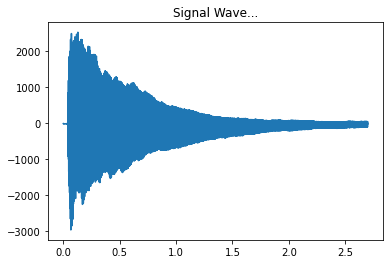

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

spf = wave.open("./samples/piano-C4.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.frombuffer(signal, dtype=np.int16)
fs = spf.getframerate()
print(fs)

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

Time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()

### References

1. [Digital Audio Fundamentals, Audacity]
2. [Sound Examples, Dan Ellis, Columbia University]
3. [Playing and Recording Sound in Python, Real Python]

[Digital Audio Fundamentals, Audacity]: https://manual.audacityteam.org/man/digital_audio.html
[Sound Examples, Dan Ellis, Columbia University]: https://www.ee.columbia.edu/~dpwe/sounds/
[Playing and Recording Sound in Python, Real Python]: https://realpython.com/playing-and-recording-sound-python/

In [7]:
1/0.006

166.66666666666666

In [8]:
import wave
import numpy

# Read file to get buffer                                                                                               
ifile = wave.open("input.wav")
samples = ifile.getnframes()
audio = ifile.readframes(samples)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_int16 = numpy.frombuffer(audio, dtype=numpy.int16)
audio_as_np_float32 = audio_as_np_int16.astype(numpy.float32)

# Normalise float32 array so that values are between -1.0 and +1.0                                                      
max_int16 = 2**15
audio_normalised = audio_as_np_float32 / max_int16



FileNotFoundError: [Errno 2] No such file or directory: 'input.wav'